<center> <h1> Домашнее задание “Анализ данных scRNA-seq”
 </h1> </center>


 ## Практическая часть

 **Какой датасет вы взяли (если не тот что прописан по умолчанию)?**

 - Я переходила на сайт **``Human Cell Atlas``** [https://data.humancellatlas.org/hca-bio-networks/nervous-system/atlases/brain-v1-0], чтобы ознакомиться с различными областями мозга, которые можно взять на анализ. Там было 104 представленных варианта с Dissection, но в учебных целях решила взять  датасет для анализа  тот, что предложил преподаватель: **``Dissection: Basal nuclei (BN) - Nucleus Accumbens - NAC.``**
   

### Установка библиотек и скачивание данных

In [1]:
! wget https://datasets.cellxgene.cziscience.com/b9cbe943-ad26-4cac-8798-6453b80834bf.h5ad -O HumanBrain_NuclAccumb.h5ad

--2024-11-01 08:56:24--  https://datasets.cellxgene.cziscience.com/b9cbe943-ad26-4cac-8798-6453b80834bf.h5ad
Resolving datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)... 13.32.151.37, 13.32.151.100, 13.32.151.108, ...
Connecting to datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)|13.32.151.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409631638 (391M) [binary/octet-stream]
Saving to: ‘HumanBrain_NuclAccumb.h5ad’

HumanBrain_NuclAccu 100%[===================>] 390.65M  85.7MB/s    in 4.5s    

2024-11-01 08:56:28 (87.7 MB/s) - ‘HumanBrain_NuclAccumb.h5ad’ saved [409631638/409631638]



In [2]:
!pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 3.6 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=bd0ffbb0095ca3d3f8f218769701d8b2bf22302a3f8c48c60401da82d9db54e9
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.10.3 anndata==0.10.9 umap==0.5.7 numpy==1.26.4 scipy==1.13.1 pandas==2.2.2 scikit-learn==1.5.2 statsmodels==0.14.4 pynndescent==0.5.13


### Знакомство с данными



В `scanpy` данные хранятся в т.н. объекте AnnData:

- `adata.X` - таблица с данными (обычно в sparse формате)
- `adata.obs` - метаданные наблюдений (клеток)
- `adata.var` - метаднанные переменных (генов)

Еще есть поля с дополнительными данными (`obsm`, `varm`) и `uns` - unstructured - любые другие полезные данные.

![image.png](attachment:b8c066ab-4d52-4668-80ec-652b9f702c11.png)

### Импорт данных


In [ ]:
adata = sc.read_h5ad('HumanBrain_NuclAccumb.h5ad')

## Анализ данных

In [ ]:
adata

AnnData object with n_obs × n_vars = 30132 × 59236
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_UMAP', 'X_tSNE'

**``Anndata``** - основной класс данных, который использует scanpy для хранения данных о единичных клетках

**``scanpy``** для работы с данными single-cell транскриптомики

``adata.X``: основная матрица данных (обычно экспрессионная матрица генов), где строки соответствуют клеткам, а столбцы — генам

Вижу из приведенной информации:
- ``n_obs`` (наблюдения) = 30132: количество клеток в данных
- ``n_vars`` (переменные) = 59236: количество   генов в  наборе данных

In [ ]:
# Название анализируемого датасета также можно найти из информации
title = adata.uns['title']
title

'Dissection: Basal nuclei (BN) - Nucleus Accumbens - NAC'

In [ ]:
## Общее количество клеток
adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]
adata.obs_names

Index(['Cell_0', 'Cell_1', 'Cell_2', 'Cell_3', 'Cell_4', 'Cell_5', 'Cell_6',
       'Cell_7', 'Cell_8', 'Cell_9',
       ...
       'Cell_30122', 'Cell_30123', 'Cell_30124', 'Cell_30125', 'Cell_30126',
       'Cell_30127', 'Cell_30128', 'Cell_30129', 'Cell_30130', 'Cell_30131'],
      dtype='object', length=30132)

In [ ]:
print('Общее количество клеток:', len(adata.obs_names))

Общее количество клеток: 30132


In [ ]:
# Общее количество генов
adata.var_names = [f"Gene_{i:d}" for i in range(adata.n_vars)]
print(adata.var_names)

Index(['Gene_0', 'Gene_1', 'Gene_2', 'Gene_3', 'Gene_4', 'Gene_5', 'Gene_6',
       'Gene_7', 'Gene_8', 'Gene_9',
       ...
       'Gene_59226', 'Gene_59227', 'Gene_59228', 'Gene_59229', 'Gene_59230',
       'Gene_59231', 'Gene_59232', 'Gene_59233', 'Gene_59234', 'Gene_59235'],
      dtype='object', length=59236)


In [ ]:
print('Общее число генов:', len(adata.var_names))

Общее число генов: 59236


### Версия схемы
В ``CELLxGENE`` есть унифицированный вид того в каком виде люди должны приложить данные: схема. Версия схемы может меняться, поэтому бывает полезно уметь найти где это спрятано в датасете.

In [ ]:
schema_version = adata.uns['schema_version']
print(schema_version)

5.2.0


In [ ]:
### Схема референса

In [ ]:
schema_ref = adata.uns['schema_reference']
print(schema_ref)

https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/5.2.0/schema.md


## Метаданные клеток

In [ ]:
for col in adata.obs:
    print(col)

roi
organism_ontology_term_id
disease_ontology_term_id
self_reported_ethnicity_ontology_term_id
assay_ontology_term_id
sex_ontology_term_id
development_stage_ontology_term_id
donor_id
suspension_type
dissection
fraction_mitochondrial
fraction_unspliced
cell_cycle_score
total_genes
total_UMIs
sample_id
supercluster_term
cluster_id
subcluster_id
cell_type_ontology_term_id
tissue_ontology_term_id
is_primary_data
tissue_type
cell_type
assay
disease
organism
sex
tissue
self_reported_ethnicity
development_stage
observation_joinid


Данные, представляющие наблюдения (клетки) было интересно проанализировать.

Например:

1. К какому полу относится наблюдение (клетка): выбор через рандом случаных пяти клеток

In [ ]:
adata.obs[['sex']].sample(5)

,sex
Cell_22843,male
Cell_6374,male
Cell_9509,male
Cell_25283,male
Cell_5955,male


In [ ]:
adata.obs[['sex']].value_counts()

,count
sex,
male,30132


2. Какие типы клеток

In [ ]:
adata.obs[['cell_type']].value_counts()

,count
cell_type,
neuron,27406
oligodendrocyte,1188
astrocyte,707
oligodendrocyte precursor cell,538
central nervous system macrophage,166
ependymal cell,94
fibroblast,10
vascular associated smooth muscle cell,9
pericyte,6


3. Есть ли клетки с определенными типами заболеваний. Как видно из результатов, все клетки (30132) являются нормальными

In [ ]:
adata.obs[['disease']].value_counts()

disease
normal     30132
Name: count, dtype: int64

4. Стадия развития (сколько лет)

In [ ]:
adata.obs[['development_stage']].value_counts()

development_stage
42-year-old stage    11335
50-year-old stage    10522
29-year-old stage     8275
Name: count, dtype: int64

5. Тип ткани

In [ ]:
adata.obs[['tissue_type']].sample(5)

,tissue_type
Cell_9972,tissue
Cell_11390,tissue
Cell_22566,tissue
Cell_9714,tissue
Cell_13050,tissue


In [ ]:
adata.obs[['tissue_type']].value_counts()

tissue_type
tissue         30132
Name: count, dtype: int64

6. Из какого организма получены клетки (тоже полезно, хотя мы знаем что Human Atlas данные, но мало ли ахаха)

In [ ]:
adata.obs[['organism']].value_counts()

organism    
Homo sapiens    30132
Name: count, dtype: int64

In [ ]:
adata.obs[['suspension_type']].value_counts()

suspension_type
nucleus            30132
Name: count, dtype: int64

7. Откуда мы получили (как видно из результата ядро)

In [ ]:
adata.obs[['roi']].value_counts()

roi      
Human NAC    30132
Name: count, dtype: int64

## Метаданные генов

Что можно сказать о генах?

In [ ]:
for col in adata.var:
    print(col)

Biotype
Chromosome
End
Gene
Start
feature_is_filtered
feature_name
feature_reference
feature_biotype
feature_length
feature_type


Например, можно определить координаты (старт и конец) в хромосоме каждого представленного гена

In [ ]:
adata.var[['Chromosome', 'Start', 'End', 'feature_name', 'Gene']].sample(7)

,Chromosome,Start,End,feature_name,Gene
Gene_52773,chr19,48469208,48482314,CYTH2,CYTH2
Gene_58377,chr2,68467572,68655862,APLF,APLF
Gene_42649,chr3,198053522,198080720,ANKRD18DP_ENSG00000226435,ANKRD18DP
Gene_33752,chrX,129446501,129523500,SMARCA1,SMARCA1
Gene_5233,chrX,134170041,134170111,MIR18B,MIR18B
Gene_45395,chr7,130506238,130668748,COPG2,COPG2
Gene_29714,chr12,92883773,92884700,HNRNPA1P50,HNRNPA1P50


Можно посмотреть отдельно, какие хроомосомы представлены в данных

In [ ]:
adata.var[['Chromosome']].value_counts()

Chromosome             
chr1                       5359
chr2                       4118
chr11                      3299
chr3                       3140
chr12                      3014
chr6                       3007
chr17                      2966
chr7                       2936
chr5                       2927
chr19                      2909
chr4                       2601
chr16                      2469
chr8                       2425
chrX                       2291
chr9                       2263
chr10                      2261
chr14                      2243
chr15                      2166
chr20                      1439
chr13                      1377
chr22                      1343
chr18                      1225
chr21                       845
chrY                        533
chrM                         37
chr22_KI270731v1              5
chr16_KI270728v1              4
chr15_KI270727v1              4
chrUn_GL000220v1              4
chr22_KI270733v1              4
chr11_KI270721v1

Можно еще из интересненького посмотреть каждый **ген**, определить его ***тип*** (кодирующий или микроРНК, например) и проверить по колонке `feature_biotype`

In [ ]:
adata.var[['feature_name', 'feature_type', 'feature_biotype']]

,feature_name,feature_type,feature_biotype
Gene_0,LRRC38,protein_coding,gene
Gene_1,SEC14L6,protein_coding,gene
Gene_2,OR7E38P,unprocessed_pseudogene,gene
Gene_3,RPS6KA1,protein_coding,gene
Gene_4,ENSG00000267509.5,lncRNA,gene
...,...,...,...
Gene_59231,CC2D2B,protein_coding,gene
Gene_59232,ADAD2,protein_coding,gene
Gene_59233,SH3BP2,protein_coding,gene
Gene_59234,BAIAP2L1,protein_coding,gene


Сколько есть возможных уникальных значений ``feature_type``?

Выпишите 4 любых возможных
значеияe

In [ ]:
# число уникальных значений
len(list(adata.var[['feature_type']].value_counts()))

39

In [ ]:
#возможные значения
adata.var[['feature_type']].value_counts()

feature_type                      
protein_coding                        19341
lncRNA                                16397
processed_pseudogene                   9998
unprocessed_pseudogene                 2529
misc_RNA                               2218
snRNA                                  1910
miRNA                                  1877
TEC                                    1032
snoRNA                                  939
transcribed_unprocessed_pseudogene      936
transcribed_processed_pseudogene        499
rRNA_pseudogene                         496
IG_V_pseudogene                         185
transcribed_unitary_pseudogene          153
IG_V_gene                               142
TR_V_gene                               106
unitary_pseudogene                       97
TR_J_gene                                79
rRNA                                     53
scaRNA                                   49
IG_D_gene                                37
TR_V_pseudogene                          

In [ ]:
#возможные четыре значения
adata.var[['feature_type']].value_counts()[:4]

feature_type          
protein_coding            19341
lncRNA                    16397
processed_pseudogene       9998
unprocessed_pseudogene     2529
Name: count, dtype: int64

Код сборки 9606 - *Homo sapiens*

In [ ]:
adata.var[['feature_reference']].value_counts()

feature_reference
NCBITaxon:9606       59236
Name: count, dtype: int64

## QC - графики распределений

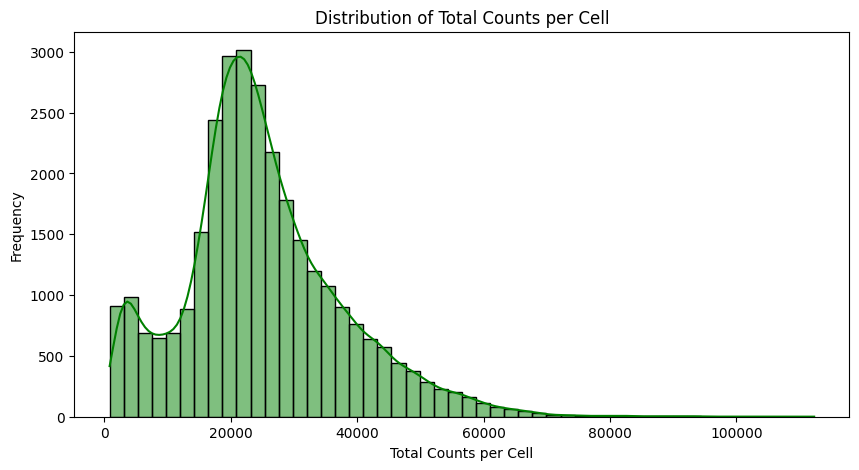

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as sp
adata.obs['total_counts_per_cell'] = adata.X.sum(axis=1).A1  # Используйте .A1 для преобразования из матрицы в массив

# Построение распределения суммарного числа каунтов на клетку
plt.figure(figsize=(10, 5))
sns.histplot(adata.obs['total_counts_per_cell'], bins=50, kde=True, color = 'Green')
plt.xlabel('Total Counts per Cell')
plt.ylabel('Frequency')
plt.title('Distribution of Total Counts per Cell')
plt.show()

Из основного, что вижу на графике: суммарное количество каунтов на клетку для данного набора данных распределено **с правосторонней асимметрией**, основная масса клеток имеет количество каунтов примерно от 15,000 до 30,000, в то время как меньшая часть клеток имеет значительное количество каунтов, что и создаёт длинный правый хвост.








Update: подпись` Distribution of log1p Total Counts per Сell`, из-за копипаста с геном не поправила

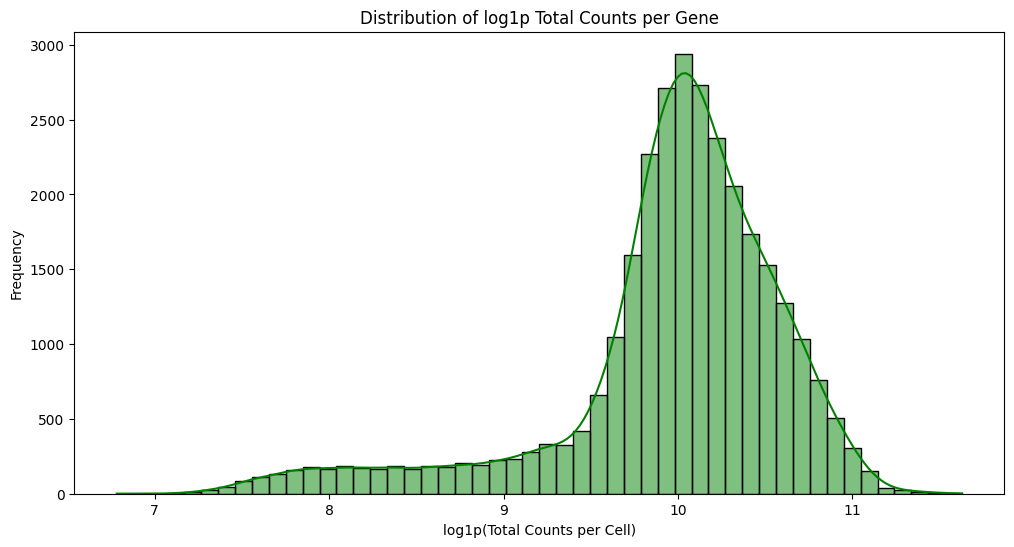

In [ ]:
adata.obs['log1p_total_counts'] = np.log1p(adata.obs['total_counts_per_cell'])

plt.figure(figsize=(12, 6))
sns.histplot(adata.obs['log1p_total_counts'], bins=50, kde = True, color='green')
plt.xlabel('log1p(Total Counts per Cell)')
plt.ylabel('Frequency')
plt.title('Distribution of log1p Total Counts per Gene') #cell
plt.show()

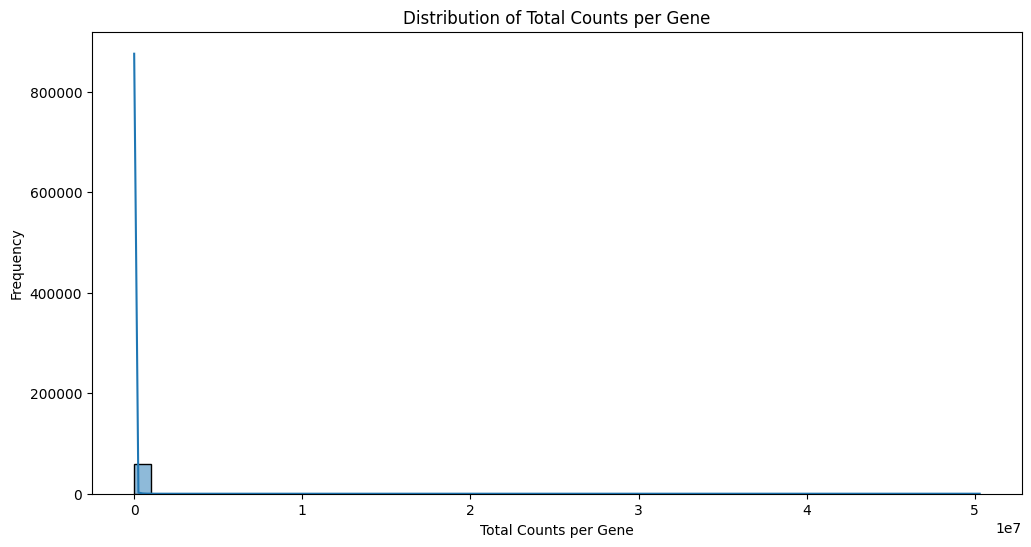

In [ ]:
# Построение распределения суммарного числа каунтов на ген
adata.var['total_counts_per_gene'] = adata.X.sum(axis=0).A1

plt.figure(figsize=(12, 6))
sns.histplot(adata.var['total_counts_per_gene'], bins=50, kde=True)
plt.xlabel('Total Counts per Gene')
plt.ylabel('Frequency')
plt.title('Distribution of Total Counts per Gene')
plt.show()

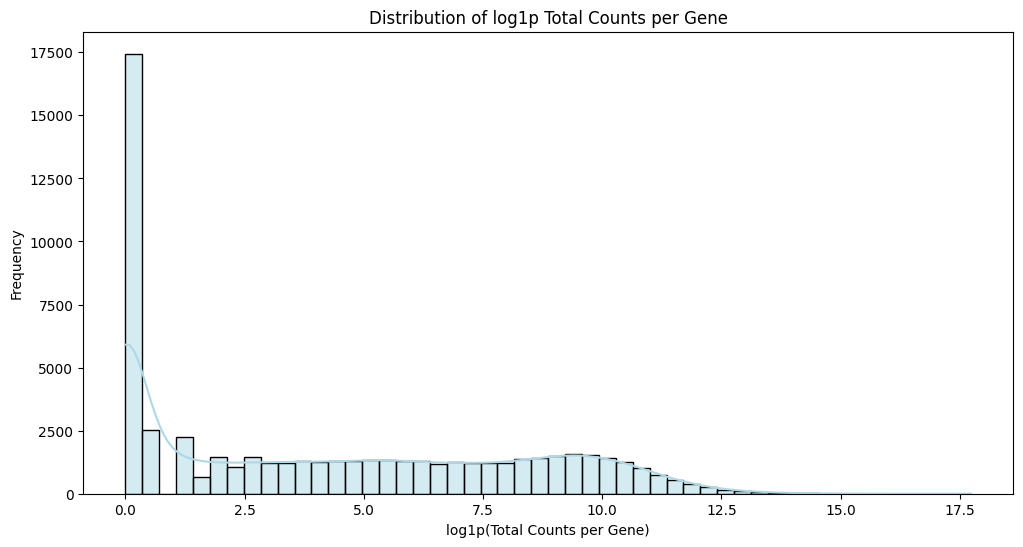

In [ ]:
adata.var['log1p_total_counts'] = np.log1p(adata.var['total_counts_per_gene'])

plt.figure(figsize=(12, 6))
sns.histplot(adata.var['log1p_total_counts'], bins=50, kde = True, color='lightblue')
plt.xlabel('log1p(Total Counts per Gene)')
plt.ylabel('Frequency')
plt.title('Distribution of log1p Total Counts per Gene')
plt.show()

## Фильтруем данные: убираем дублеты

In [ ]:
!pip install scrublet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552445 sha256=3d159794203242332fe663812309b5c22fd0cb99c0bcdd7078bee1bd61440bc2
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


Использовала инструмент scrublet для поиска дубликатов. Так как запуск программы на целый массив anndata вызывал ошибку памяти, после попыток запустить на Google Colab (все равно не хватало даже на нем ОЗУ, чтобы проанализировать adata), я решила использовать анализ «партиями» или бэтчами в размере 10 тыс. На всякий случай я сохранила отфильтрованные данные в `adata_filtered.h5ad`

Для этого я использовала класс `csr_matrix` из `scipy.sparse` для эффективной работы с разреженными матрицами (**Compressed Sparse Row (CSR)**)
Все остальные параметры и действия применять было стремно после такого опыта с полетевшим окружением аахахаах

А другие пакеты **(DoubletFinder или bDoublet**) я не стала интегрировать в питон из R


In [ ]:
import scrublet as scr
from scipy.sparse import csr_matrix

if not isinstance(adata.X, csr_matrix):
    adata.X = csr_matrix(adata.X)

In [ ]:
batch_size = 10000
doublet_scores = np.zeros(adata.shape[0])
predicted_doublets = np.zeros(adata.shape[0], dtype=bool)

for start in range(0, adata.shape[0], batch_size):
    end = min(start + batch_size, adata.shape[0])
    scrub = scr.Scrublet(adata.X[start:end])
    batch_doublet_scores, batch_predicted_doublets = scrub.scrub_doublets()
    doublet_scores[start:end] = batch_doublet_scores
    predicted_doublets[start:end] = batch_predicted_doublets

adata.obs['doublet_scores'] = doublet_scores
adata.obs['predicted_doublets'] = predicted_doublets

adata = adata[~adata.obs['predicted_doublets']].copy()

adata.write('adata_filtered.h5ad')


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 48.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.3%
Elapsed time: 58.9 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.64
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 22.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.2%
Elapsed time: 45.6 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 38.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.6%
Elapsed time: 48.4 seconds
Preprocessing...
Simulating dou

In [ ]:
adata

AnnData object with n_obs × n_vars = 30079 × 59236
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'doublet_scores', 'predicted_doublets'
    var: 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_UMAP',

In [ ]:
adata.obs[['doublet_scores']].size

30079

In [ ]:
adata.obs.shape

(30079, 34)

## Фильтруем данные: убираем гены и клетки с низким числом каунтов.

In [ ]:
min_total_counts_per_gene = 7
min_total_counts_per_cell = 500

In [ ]:
# Подсчитаю суммарное количество каунтов на ген
gene_counts = adata.X.sum(axis=0)  # Суммирую через axis=0 (клетки), то есть тотал каунтс для всех генов
gene_counts = np.array(gene_counts).flatten()  # Переведу в 1D array

# Фильтрация генов
adata = adata[:, gene_counts >= min_total_counts_per_gene]

# Подсчитаю суммарное количество каунтов на клетку
cell_counts = adata.X.sum(axis=1)  # Суммирую уже наоборот через axis=1 (гены), ранние попытки приводили к несовпадение по dimension anndata
cell_counts = np.array(cell_counts).flatten()  # Переведу в 1D array

# Фильтрация клеток
adata = adata[cell_counts >= min_total_counts_per_cell, :]

In [ ]:
print("Суммарное число генов на каждую клетку:", gene_counts[10:20])

Суммарное число генов на каждую клетку: [ 2698. 20996. 21686. 49777. 27323. 30665. 14165. 13071. 18042.  1045.]


In [ ]:
print("Cуммарноe число каунтов на каждую клетку:", cell_counts[:10])

Cуммарноe число каунтов на каждую клетку: [ 2021. 28959. 29281. 22812. 17427. 35631. 29197. 30638. 33583. 26657.]


#Построение графиков

### Строим mean-var plot

In [ ]:
def plot_mean_var_plot(adata):
    arr = adata.X.toarray()
    mean_expression = arr.mean(axis=0)
    variance_expression = arr.var(axis=0)


    plt.figure(figsize=(10, 10))
    plt.scatter(mean_expression, variance_expression, alpha=0.5)
    plt.title('Mean-var plot')
    plt.xlabel('Mean gene expression')
    plt.ylabel('Gene expression variance')

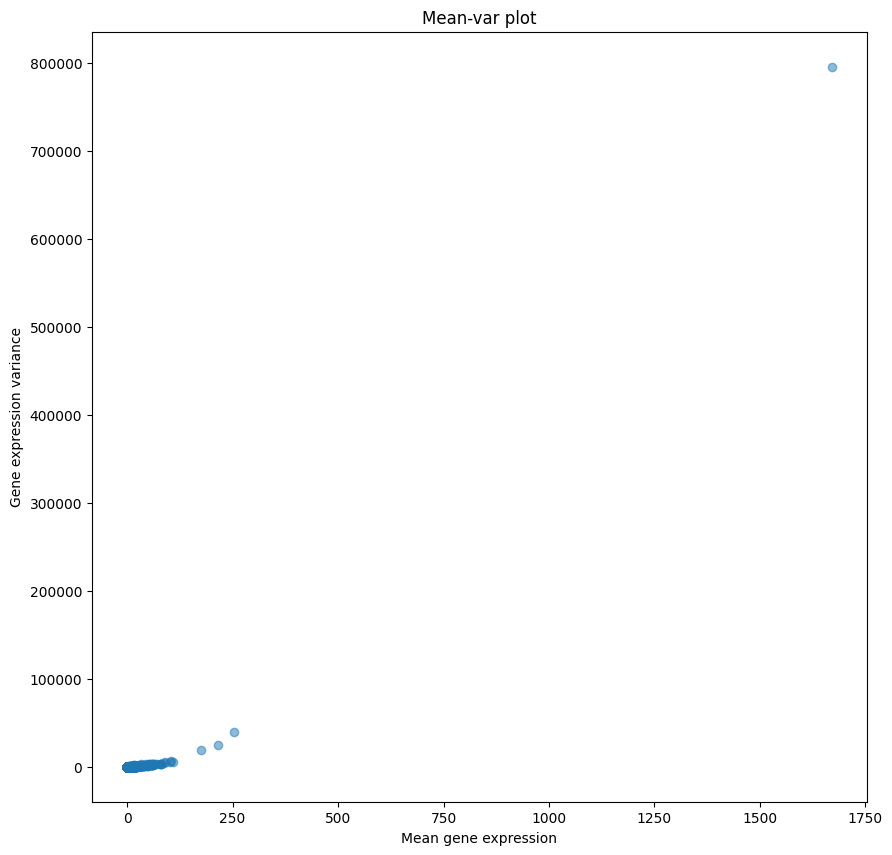

In [ ]:
plot_mean_var_plot(adata)

### Делаем PCA

In [ ]:
# Считаем PCA
sc.tl.pca(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


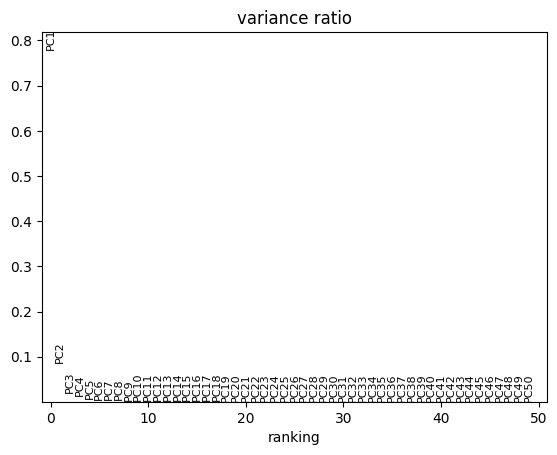

In [ ]:
# Строим scree-plot. Сколько главных компонент логично использовать?
sc.pl.pca_variance_ratio(adata, n_pcs=50)

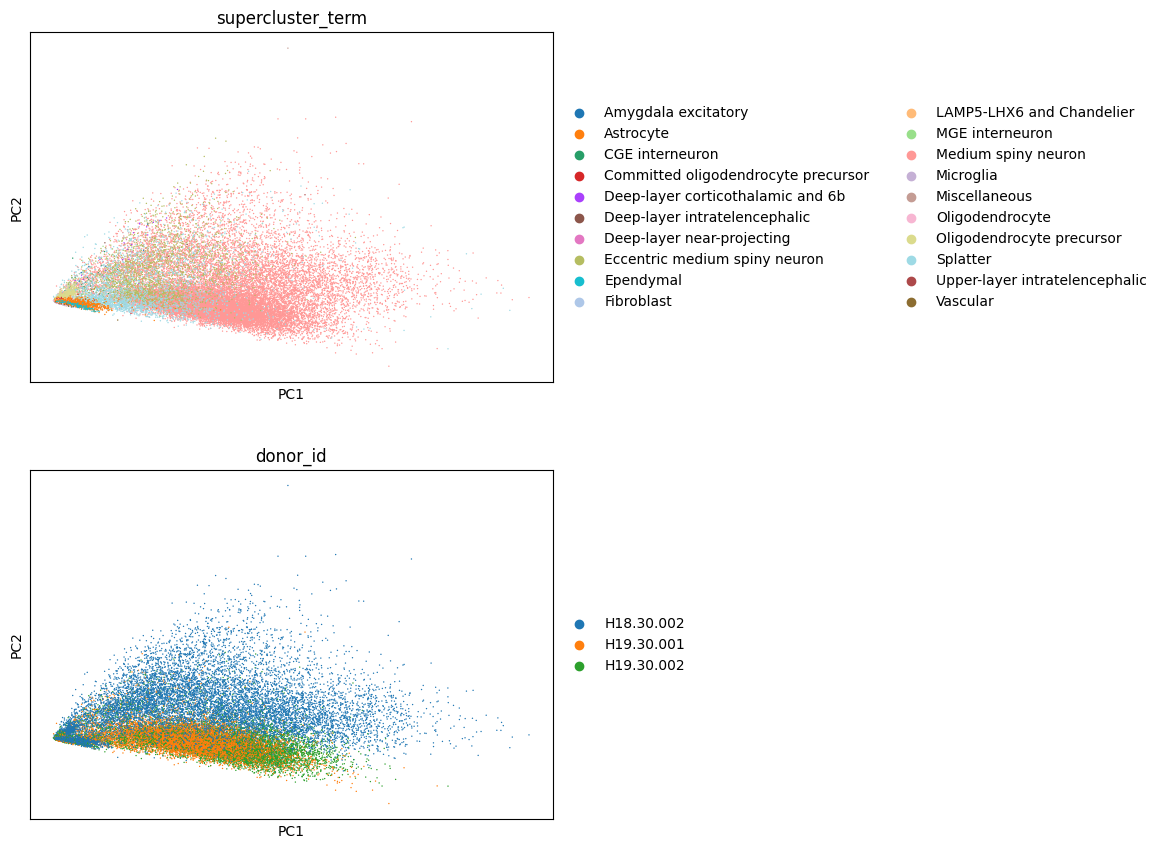

In [ ]:
# Строим PCA
sc.pl.pca(adata, color=['supercluster_term', 'donor_id'], ncols=1)

In [ ]:
explained_variance_ratio = adata.uns['pca']['variance_ratio']
cumulative_variance_ratio = explained_variance_ratio.cumsum()
num_components = (cumulative_variance_ratio < 0.85).sum() + 1  # выбираем число компонент, чтобы объяснить >=85% вариации

In [ ]:
print(num_components)

2


### Gene loadings in PCA

In [ ]:
def plot_gene_loadings_vs_mean_expression(adata, PC=1):
    mean_expression = np.array(adata.X.mean(axis=0)).flatten()
    pca_loadings = adata.varm['PCs'][:, PC-1]

    plt.figure(figsize=(3, 3))
    plt.scatter(mean_expression, pca_loadings, alpha=0.5)
    plt.title(f'PCA Loadings (PC{PC}) vs. Mean Gene Expression')
    plt.xlabel(f'Mean Gene Expression')
    plt.ylabel(f'PCA Loadings (PC{PC})')
    plt.grid(True)
    plt.show()

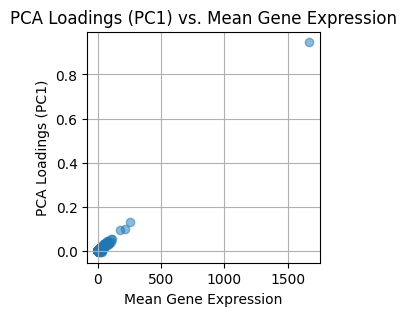

In [ ]:
plot_gene_loadings_vs_mean_expression(adata)

### Нормализация данных

In [ ]:
# Нормализация данных
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

### Mean-var plot и PCA gene loadings на нормализованных данных

In [ ]:
def plot_mean_var_plot(adata):
    arr = adata.X.toarray()
    mean_expression = arr.mean(axis=0)
    variance_expression = arr.var(axis=0)


    plt.figure(figsize=(3, 3))
    plt.scatter(mean_expression, variance_expression, alpha=0.5)
    plt.title('Mean-var plot')
    plt.xlabel('Mean gene expression')
    plt.ylabel('Gene expression variance')

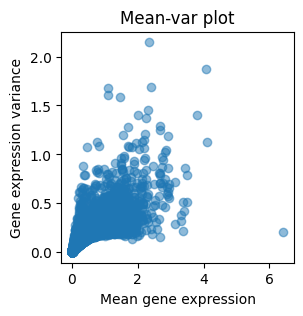

In [ ]:
plot_mean_var_plot(adata)

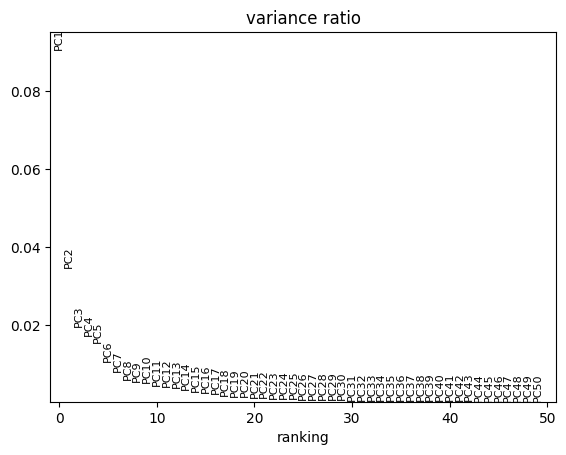

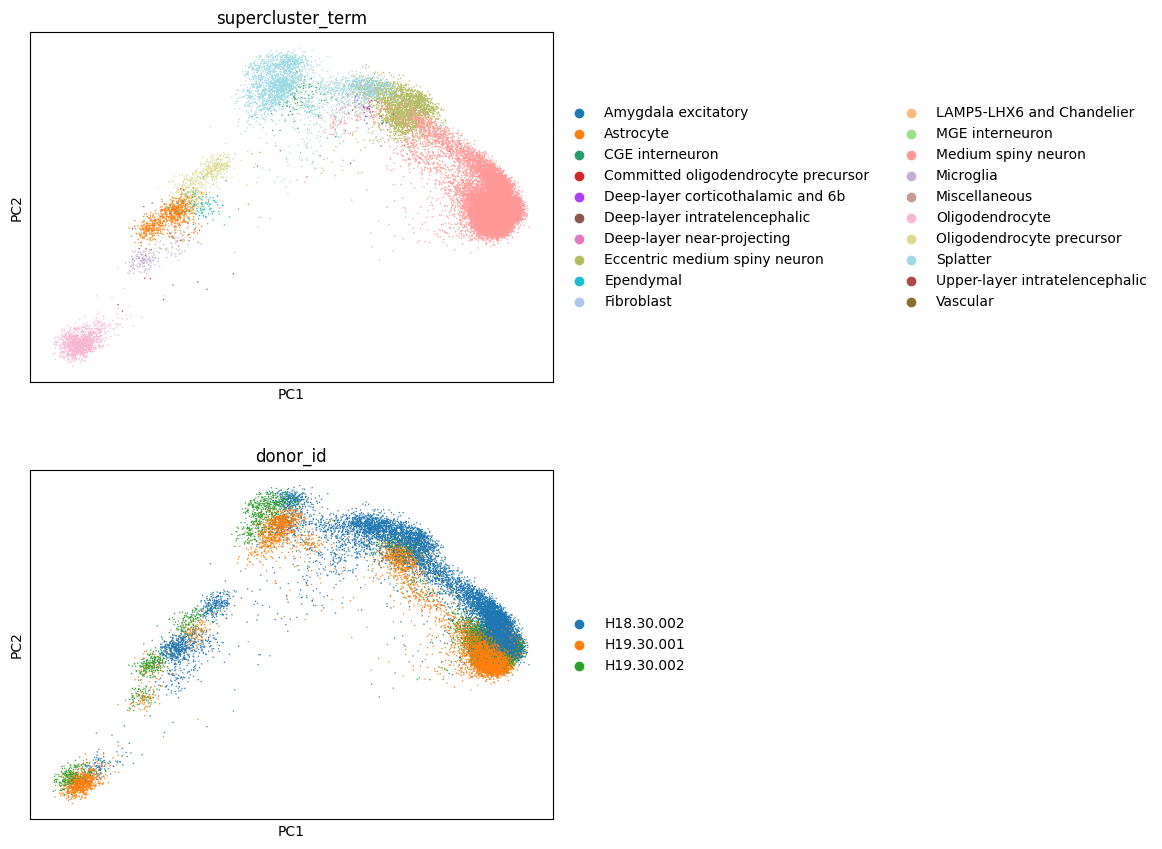

In [ ]:
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50)
sc.pl.pca(adata, color=['supercluster_term', 'donor_id'], ncols=1)

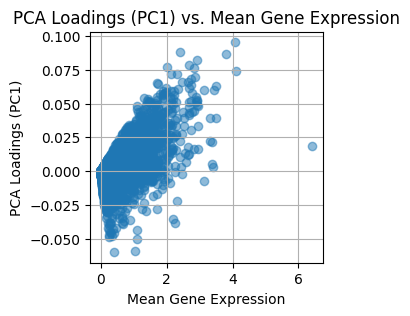

In [ ]:
plot_gene_loadings_vs_mean_expression(adata) # у меня получилось так, но у вас может быть по-другому

### UMAP

In [ ]:
# Рассчитываем UMAP
sc.pp.neighbors(adata) # помним, для UMAP нужен kNN-graph!
sc.tl.umap(adata)

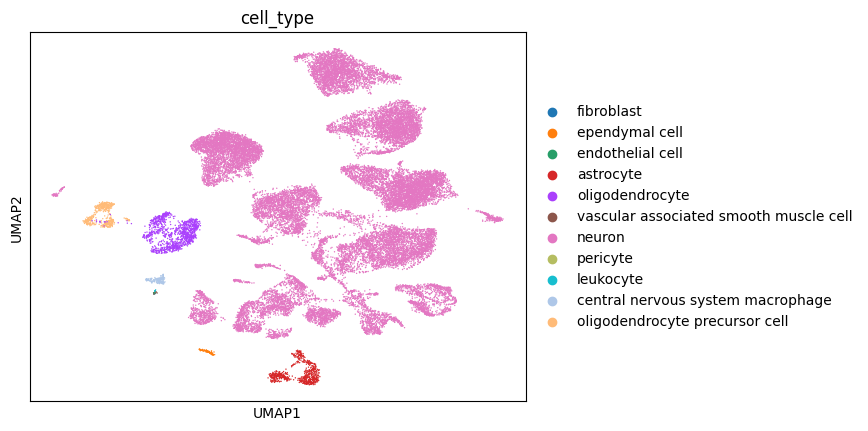

In [ ]:
sc.pl.umap(adata, color='cell_type')


In [ ]:
adata.var['Gene'].sample(10)

,Gene
ENSG00000261978,AC116025.1
ENSG00000235461,AC003001.1
ENSG00000164961,WASHC5
ENSG00000117461,PIK3R3
ENSG00000272297,AC018709.1
ENSG00000259365,AC019254.2
ENSG00000247796,AC008966.1
ENSG00000112655,PTK7
ENSG00000028277,POU2F2
ENSG00000255182,AC084125.2


### Экспрессия генов

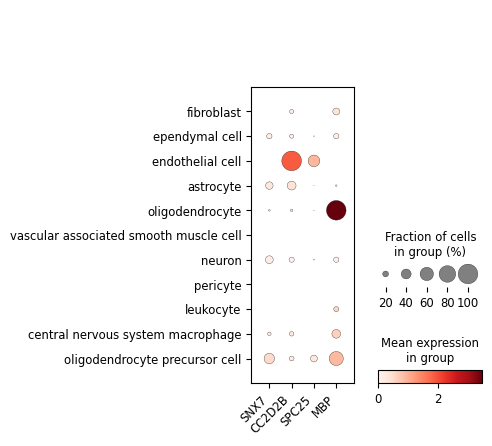

In [ ]:
selected_genes = ['SNX7', 'CC2D2B','SPC25', 'MBP']
dp = sc.pl.dotplot(adata, selected_genes,
                   groupby="cell_type", gene_symbols='Gene',
                   return_fig=True)

# Дополнительные настройки графиков (чтобы было красиво)
ax = dp.get_axes()['mainplot_ax']
ax.tick_params(axis='x', labelrotation=45)
for label in ax.get_xticklabels():
    label.set_ha('right')  # Horizontal alignment